In [28]:
import json
import jsonlines
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from sklearn.metrics import roc_auc_score, log_loss, f1_score, confusion_matrix, classification_report
import random

In [14]:
pred= pd.read_csv('test_result/incep_res_0403.csv')
pred

image_id                                   dir       label  \
0       토스 만보_459.jpg   ../Data/carbon_reduction/10kwalking  10kwalking   
1     캐시워크 만보_262.jpg   ../Data/carbon_reduction/10kwalking  10kwalking   
2     아이폰 걸음수_192.jpg   ../Data/carbon_reduction/10kwalking  10kwalking   
3     삼성헬스 만보_352.jpg   ../Data/carbon_reduction/10kwalking  10kwalking   
4     아이폰 걸음수_408.jpg   ../Data/carbon_reduction/10kwalking  10kwalking   
...               ...                                   ...         ...   
3995      양치컵_310.jpg  ../Data/carbon_reduction/cup/양치컵_네이버         cup   
3996      양치컵_256.jpg  ../Data/carbon_reduction/cup/양치컵_네이버         cup   
3997      양치컵_250.jpg  ../Data/carbon_reduction/cup/양치컵_네이버         cup   
3998      양치컵_114.jpg  ../Data/carbon_reduction/cup/양치컵_네이버         cup   
3999      양치컵_005.jpg  ../Data/carbon_reduction/cup/양치컵_네이버         cup   

            pred  confidence score  
0     10kwalking          0.999351  
1     10kwalking          0.999483  
2     10kwalking          0.999304  
3     10kwalking          0.999679  
4     10kwalking          0.999682  
...          ...               ...  
3995         cup          0.999634  
3996         cup          0.999704  
3997         cup          0.999633  
3998         cup          0.999681  
3999         cup          0.999773  

[4000 rows x 5 columns]

In [15]:
test_acc = np.sum(pred.label == pred.pred) / len(pred)
test_matrix = confusion_matrix(pred['label'], pred['pred'])
epoch_f1 = f1_score(pred['label'], pred['pred'], average='macro')

print(f'accuracy: {test_acc:.4f}')
print(f'f1_score: {epoch_f1:.4f}')
print(f'confusion_matrix \n-------------------------\n {test_matrix}')

accuracy: 0.8850
f1_score: 0.8938
confusion_matrix 
-------------------------
 [[386   0   0   2   8   4   0   0   0   0]
 [  0 382   0   0  16   1   1   0   0   0]
 [  0   1 362   2  26   2   0   7   0   0]
 [  0   0   0 307  92   1   0   0   0   0]
 [  0   3   7   8 354   8   3   5   3   9]
 [  0   1   3  25  90 281   0   0   0   0]
 [  0   0   1   1  79   0 319   0   0   0]
 [  0   0   1   2   5   0   1 391   0   0]
 [  0   0   0   1  13   1   0   0 385   0]
 [  0   0   0   0  27   0   0   0   0 373]]


In [16]:
non_matched_idx = pred['label'] != pred['pred']
non_matched = pred[non_matched_idx].reset_index(inplace = False, drop=True)

non_matched.sort_values(by=['image_id'],ascending=True, inplace=True)
tmp = non_matched['image_id'].value_counts().index.sort_values()
non_matched

image_id  \
215  08537cef-9c6e-4426-a624-d72caf2571bd_jpg.rf.61...   
58    2652_jpg.rf.84b4ccc846bc1b91e43d984b75c4b67c.jpg   
59    4571_jpg.rf.10470e351158e9e4f9df23a9b83c0470.jpg   
206  579d5d2f-5af5-4e2e-86e5-1dbdcdf8a603_jpg.rf.d1...   
214  645dc267-fab9-437f-9bb8-9f86f04ceba5_jpg.rf.b5...   
..                                                 ...   
15                                       지하철 역_170.jpg   
11                                     캐시워크 만보_099.jpg   
5                                      캐시워크 만보_449.jpg   
2                                        토스 만보_051.jpg   
0                                        토스 만보_337.jpg   

                                               dir           label  pred  \
215                   ../Data/carbon_reduction/can             can  else   
58                    ../Data/carbon_reduction/pet             pet   cup   
59                    ../Data/carbon_reduction/pet             pet  else   
206                   ../Data/carbon_reduction/can             can  else   
214                   ../Data/carbon_reduction/can             can  else   
..                                             ...             ...   ...   
15   ../Data/carbon_reduction/public_vehicle/지하철 역  public_vehicle  else   
11             ../Data/carbon_reduction/10kwalking      10kwalking  else   
5              ../Data/carbon_reduction/10kwalking      10kwalking  else   
2              ../Data/carbon_reduction/10kwalking      10kwalking  else   
0              ../Data/carbon_reduction/10kwalking      10kwalking  else   

     confidence score  
215          0.993281  
58           0.965881  
59           0.588359  
206          0.999476  
214          0.999952  
..                ...  
15           0.987638  
11           0.987044  
5            0.998587  
2            0.998890  
0            0.999910  

[460 rows x 5 columns]

In [ ]:
## show img status

back = 0
plt.figure(figsize=(16,500))
for i in range(len(non_matched)):
    plt.subplot(100,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
        
    path = non_matched['dir'][i] + '/' + non_matched['image_id'][i]
    try:
    # im_bgr = cv2.imread(path)
    # im_rgb = im_bgr[:, :, ::-1]
        temp = Image.open(path).convert("RGB")
        image = np.array(temp).copy()
        temp.close()

        plt.imshow(image, cmap=plt.cm.binary)
        plt.xlabel(non_matched['label'][i] + ' : ' + non_matched['pred'][i], loc='left', fontsize=10)
    except:
        plt.xlabel(path + '\n' + non_matched['label'][i] + ' : ' + non_matched['pred'][i], loc='left', fontsize=10)
        
plt.show()

In [58]:
dir_path = "../Data/annotations/"
ano = "captions_train2017.json"

with open(dir_path+ano, 'r') as open_ano:
    ano_json = json.load(open_ano)
annotations = pd.DataFrame(ano_json['annotations'])

for i in range(len(annotations['image_id'])):
    annotations['image_id'][i] = str(annotations['image_id'][i]).zfill(12) + '.jpg'
    
annotations

/tmp/ipykernel_19032/157605491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotations['image_id'][i] = str(annotations['image_id'][i]).zfill(12) + '.jpg'


image_id      id  \
0       000000203564.jpg      37   
1       000000322141.jpg      49   
2       000000016977.jpg      89   
3       000000106140.jpg      98   
4       000000106140.jpg     101   
...                  ...     ...   
591748  000000133071.jpg  829655   
591749  000000410182.jpg  829658   
591750  000000180285.jpg  829665   
591751  000000133071.jpg  829693   
591752  000000133071.jpg  829717   

                                                  caption  
0       A bicycle replica with a clock as the front wh...  
1       A room with blue walls and a white sink and door.  
2       A car that seems to be parked illegally behind...  
3       A large passenger airplane flying through the ...  
4       There is a GOL plane taking off in a partly cl...  
...                                                   ...  
591748  a slice of bread is covered with a sour cream ...  
591749  A long plate hold some fries with some sliders...  
591750       Two women sit and pose with stuffed animals.  
591751  White Plate with a lot of guacamole and an ext...  
591752      A dinner plate has a lemon wedge garnishment.  

[591753 rows x 3 columns]

In [78]:
# flickr annotations
dir_path = "../../disk/Data/"
ano = "results.csv"

annotations = pd.read_csv(dir_path+ano, delimiter='|')
annotations.rename(columns={'image_name' : 'image_id'}, inplace=True)
annotations.rename(columns={ ' comment' : 'caption'}, inplace=True)
annotations

image_id  comment_number  \
0       1000092795.jpg               0   
1       1000092795.jpg               1   
2       1000092795.jpg               2   
3       1000092795.jpg               3   
4       1000092795.jpg               4   
...                ...             ...   
158910   998845445.jpg               0   
158911   998845445.jpg               1   
158912   998845445.jpg               2   
158913   998845445.jpg               3   
158914   998845445.jpg               4   

                                                  caption  
0        Two young guys with shaggy hair look at their...  
1        Two young , White males are outside near many...  
2        Two men in green shirts are standing in a yard .  
3            A man in a blue shirt standing in a garden .  
4                 Two friends enjoy time spent together .  
...                                                   ...  
158910   A man in shorts and a Hawaiian shirt leans ov...  
158911   A young man hanging over the side of a boat ,...  
158912   A man is leaning off of the side of a blue an...  
158913   A man riding a small boat in a harbor , with ...  
158914   A man on a moored blue and white boat with hi...  

[158915 rows x 3 columns]

In [ ]:
## open_image extraction
image_id = []
captions = []
dir_path = "../Data/annotations/"
ano = "open_images_train_v6_captions.jsonl"

with jsonlines.open(dir_path+ano, 'r') as f:
    for line in f.iter():
        #if line['image_id'][0] == '0':
        image_id.append(line['image_id']+'.jpg')
        captions.append(line['caption'])
annotations = pd.DataFrame(image_id, columns=['image_id'])
annotations['caption'] = captions
annotations

In [79]:
non_matched_idx = (pred_oi['label'] != 1) & (pred_oi['label'] != pred_oi['pred'])
non_matched = pred_oi[non_matched_idx].reset_index(inplace = False, drop=True)

non_matched.sort_values(by=['image_id'],ascending=True, inplace=True)
tmp = non_matched['image_id'].value_counts().index.sort_values()
non_matched

image_id                               dir  label  pred  \
11  1394319096.jpg  ../../disk/Data/flickr30k_images      0     1   
7    207731022.jpg  ../../disk/Data/flickr30k_images      0     1   
2   2915538325.jpg  ../../disk/Data/flickr30k_images      0     1   
9   3225310099.jpg  ../../disk/Data/flickr30k_images      0     1   
1   3553056438.jpg  ../../disk/Data/flickr30k_images      0     1   
5   3606093421.jpg  ../../disk/Data/flickr30k_images      0     1   
10    38437776.jpg  ../../disk/Data/flickr30k_images      0     1   
4   4196910318.jpg  ../../disk/Data/flickr30k_images      0     1   
0   4204621843.jpg  ../../disk/Data/flickr30k_images      0     1   
6   4467116231.jpg  ../../disk/Data/flickr30k_images      0     1   
8   4662830866.jpg  ../../disk/Data/flickr30k_images      0     1   
3   4941462036.jpg  ../../disk/Data/flickr30k_images      0     1   

    confidence score  
11          0.982482  
7           0.999721  
2           0.863890  
9           0.999288  
1           0.953657  
5           0.592516  
10          0.998950  
4           0.587664  
0           0.969537  
6           0.771683  
8           0.894434  
3           0.885055

In [ ]:
non_matched_merged = pd.merge(non_matched, annotations, how='left', left_on='image_id', right_on='image_id')
non_matched_merged

In [ ]:
cnt = 4
for i,key in enumerate(tmp):
    if cnt == 4:
        print('', end='\n\n\n\n')
        print(f'{(i+1)/4}.')
        cnt = 0
    print(f"'{key}'", end=' ')
    cnt+=1


In [41]:
non_matched_merged['caption'].isnull()[0]

True

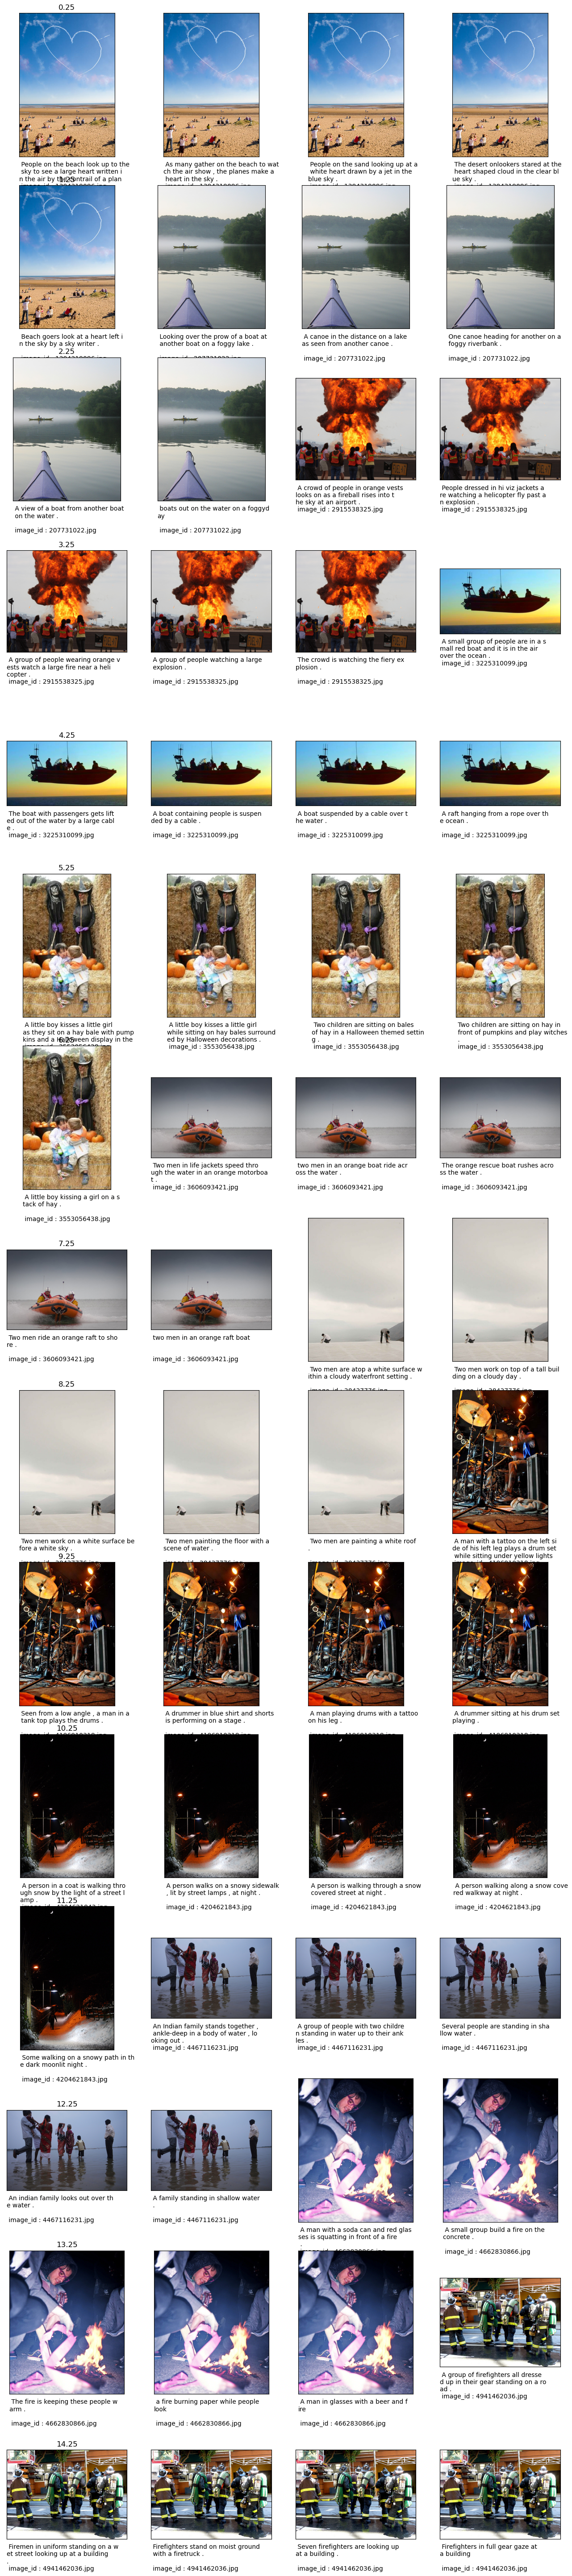

In [82]:
## show img status

back = 0
plt.figure(figsize=(16,500))
for i in range(len(non_matched_merged[back:])):
    plt.subplot(100,4,i+1)
    if i % 4 == 0:
        plt.title(f"{(i+1+back)/4}")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    path = non_matched_merged['dir'][i+back] + '/' + non_matched_merged['image_id'][i+back]
    im_bgr = cv2.imread(path)
    im_rgb = im_bgr[:, :, ::-1]
    plt.imshow(im_rgb, cmap=plt.cm.binary)
    
    if non_matched_merged['caption'].isnull()[i+back]:
        plt.xlabel('image_id : '+ str(non_matched_merged['image_id'][i+back]) , loc='left', fontsize=10)
    else : 
        plt.xlabel(non_matched_merged['caption'][i+back][:35] + '\n' + non_matched_merged['caption'][i+back][35:70] + '\n' 
               + non_matched_merged['caption'][i+back][70:105] + '\n image_id : ' + str(non_matched_merged['image_id'][i+back]) , loc='left', fontsize=10)
    #plt.legend(find['image_id'][i])
plt.show()